# Telecom Data Analysis

This notebook analyzes network performance, customer experience, and call detail records to identify patterns and insights for improving network performance and customer satisfaction.

## 1. Setup and Data Loading

### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Set plot style
plt.style.use("default")
sns.set_palette("husl")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1.2 Load Data

In [2]:
# Load network performance data
network_df = pd.read_csv("../../data/raw/sample_data/network_performance_sample.csv")
network_df["timestamp"] = pd.to_datetime(network_df["timestamp"])

# Load customer experience data
customer_df = pd.read_csv("../../data/raw/sample_data/customer_experience_sample.csv")
customer_df["timestamp"] = pd.to_datetime(customer_df["timestamp"])

# Load call detail records
cdr_df = pd.read_csv("../../data/raw/sample_data/call_detail_records_sample.csv")
cdr_df["timestamp"] = pd.to_datetime(cdr_df["timestamp"])

### 1.3 Explore Network Performance Data

In [3]:
# Display basic information about the network performance dataset
print("Network Performance Dataset Info:")
print("-" * 50)
print(f"Number of records: {len(network_df)}")
print(f"Columns: {', '.join(network_df.columns)}")
print("First few records:")
display(network_df.head())

print("Basic statistics:")
display(network_df.describe())

Network Performance Dataset Info:
--------------------------------------------------
Number of records: 6
Columns: timestamp, cell_id, latency_ms, packet_loss, throughput_mbps, signal_strength, connection_type
First few records:


,timestamp,cell_id,latency_ms,packet_loss,throughput_mbps,signal_strength,connection_type
0,2024-03-20 00:00:00,CELL_001,45.2,0.01,85.6,-65,5G
1,2024-03-20 00:00:00,CELL_002,38.7,0.02,92.3,-58,5G
2,2024-03-20 00:00:00,CELL_003,52.1,0.03,78.9,-72,LTE
3,2024-03-20 00:01:00,CELL_001,44.8,0.01,86.2,-64,5G
4,2024-03-20 00:01:00,CELL_002,39.2,0.02,91.8,-59,5G


Basic statistics:


,timestamp,latency_ms,packet_loss,throughput_mbps,signal_strength
count,6,6.000000,6.000000,6.000000,6.000000
mean,2024-03-20 00:00:30,45.300000,0.020000,85.650000,-64.833333
min,2024-03-20 00:00:00,38.700000,0.010000,78.900000,-72.000000
25%,2024-03-20 00:00:00,40.600000,0.012500,80.725000,-69.500000
50%,2024-03-20 00:00:30,45.000000,0.020000,85.900000,-64.500000
75%,2024-03-20 00:01:00,50.150000,0.027500,90.400000,-60.250000
max,2024-03-20 00:01:00,52.100000,0.030000,92.300000,-58.000000
std,NaN,5.822714,0.008944,5.844912,5.845226


## 2. Data Analysis

### 2.1 Network Performance Analysis

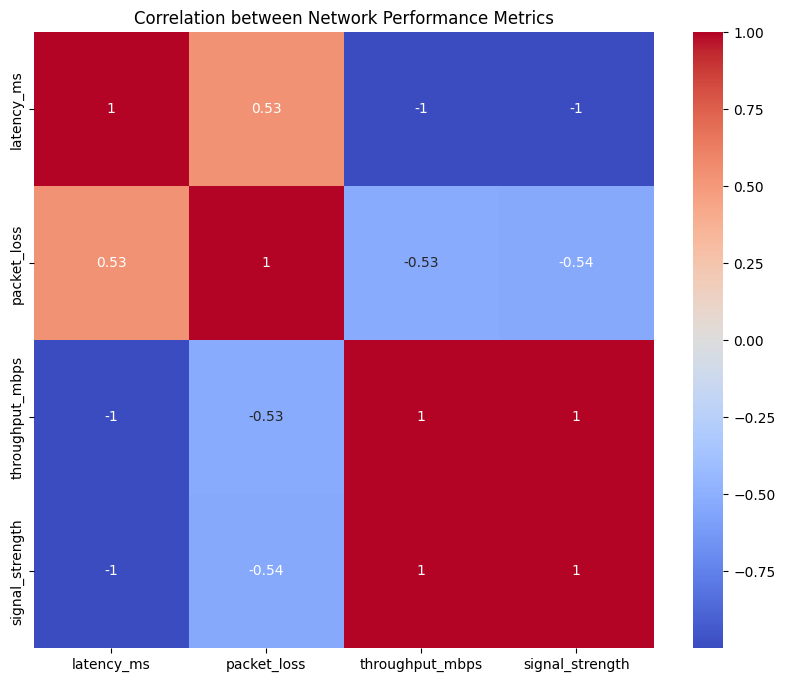

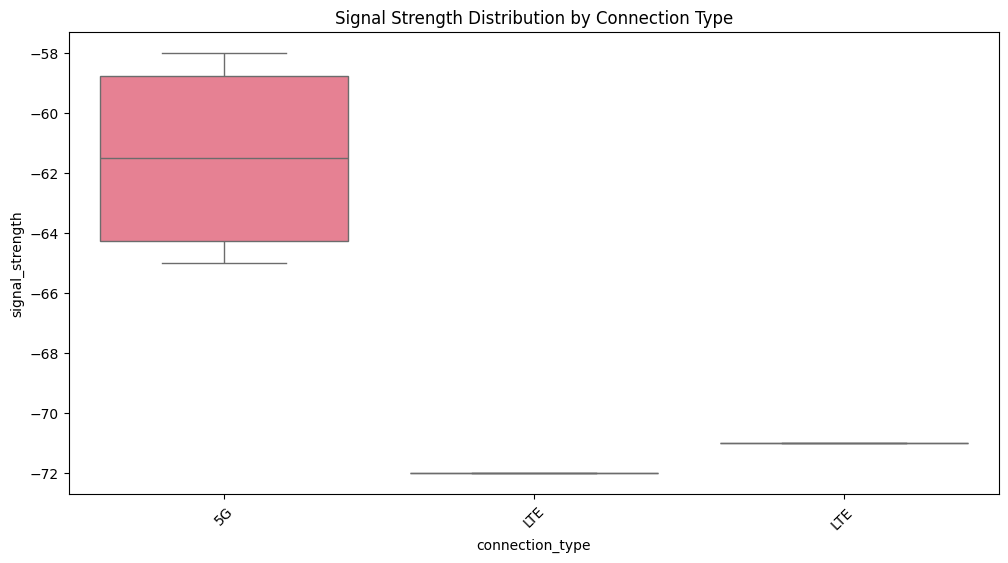

In [4]:
# Calculate correlation between network performance metrics
network_corr = network_df[['latency_ms', 'packet_loss', 'throughput_mbps', 'signal_strength']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(network_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Network Performance Metrics')
plt.show()

# Analyze signal strength by connection type
plt.figure(figsize=(12, 6))
sns.boxplot(x='connection_type', y='signal_strength', data=network_df)
plt.title('Signal Strength Distribution by Connection Type')
plt.xticks(rotation=45)
plt.show()

### 2.2 Customer Experience Analysis

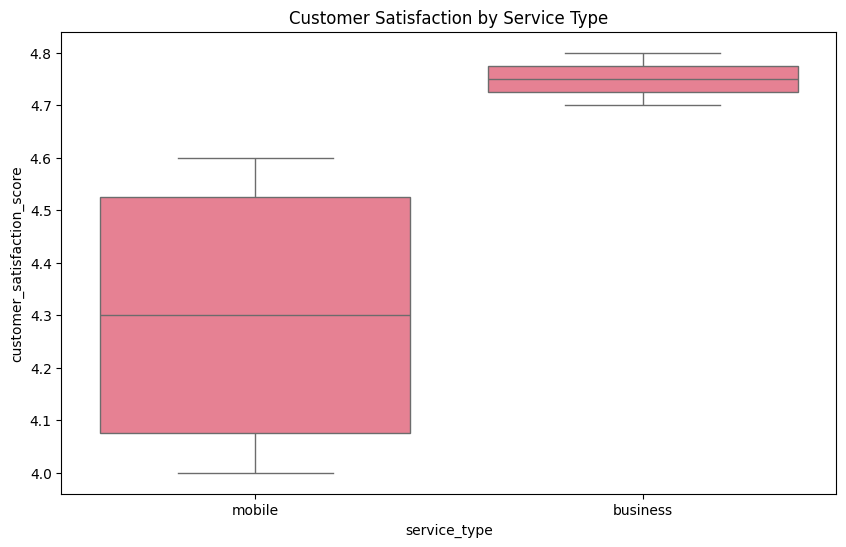

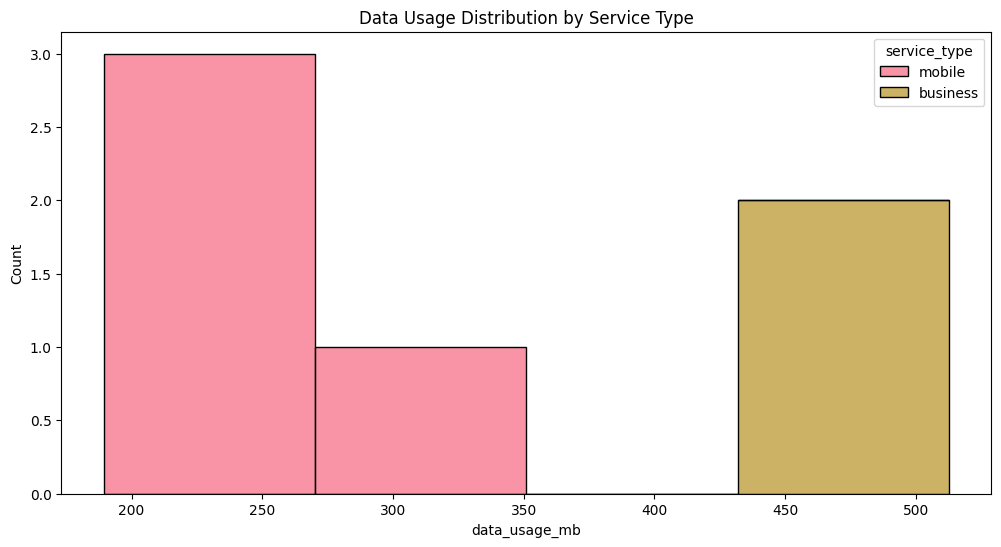

In [5]:
# Analyze customer satisfaction by service type
plt.figure(figsize=(10, 6))
sns.boxplot(x='service_type', y='customer_satisfaction_score', data=customer_df)
plt.title('Customer Satisfaction by Service Type')
plt.show()

# Plot data usage patterns
plt.figure(figsize=(12, 6))
sns.histplot(data=customer_df, x='data_usage_mb', hue='service_type', multiple='stack')
plt.title('Data Usage Distribution by Service Type')
plt.show()

### 2.3 Call Detail Records Analysis

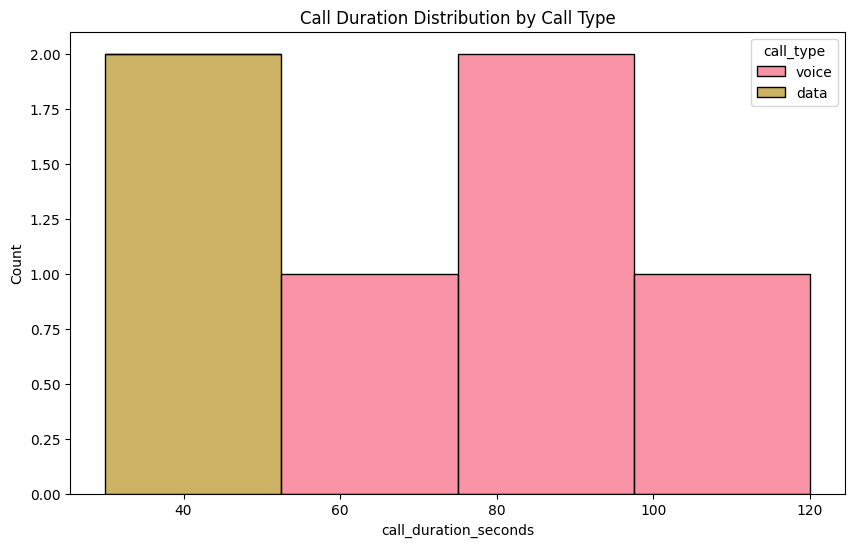

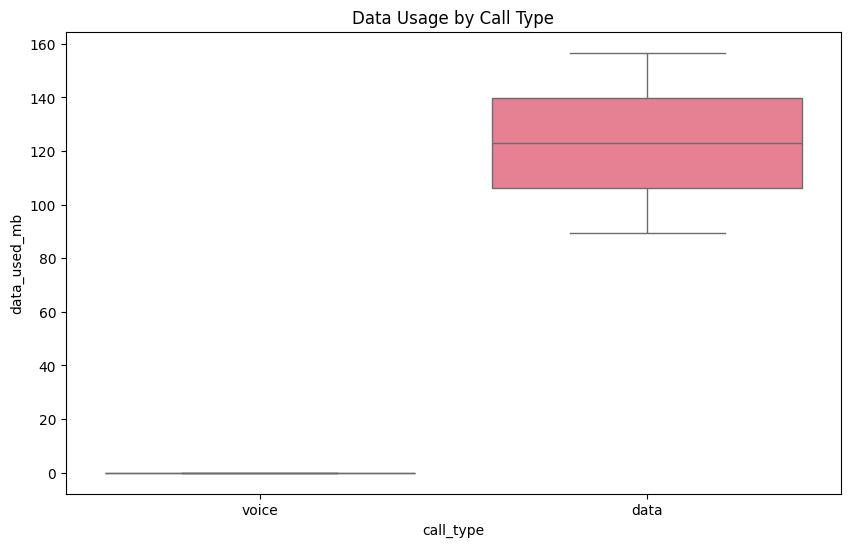

In [6]:
# Analyze call duration patterns
plt.figure(figsize=(10, 6))
sns.histplot(data=cdr_df, x='call_duration_seconds', hue='call_type', multiple='stack')
plt.title('Call Duration Distribution by Call Type')
plt.show()

# Plot data usage by call type
plt.figure(figsize=(10, 6))
sns.boxplot(x='call_type', y='data_used_mb', data=cdr_df)
plt.title('Data Usage by Call Type')
plt.show()